In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
df = pd.read_csv('data/dob_job_application_filings_subset.csv')
print(df.info())
print('######')
df_subset = df[['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee','Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories', 'Proposed No. of Stories', 'Existing Height', 'Proposed Height']]
df_subset['Initial Cost'] = df_subset['Initial Cost'].str.replace('$', '')
df_subset['Initial Cost'] = df_subset['Initial Cost'].astype(float)
df_subset['Total Est. Fee'] = df_subset['Total Est. Fee'].str.replace('$', '')
df_subset['Total Est. Fee'] = df_subset['Total Est. Fee'].astype(float)
print(df_subset.info())

#Sumário das colunas numéricas
print(df_subset.describe())

#Faz o count das colunas com dados categóricos
print(df['Borough'].value_counts(dropna=False))
print(df['State'].value_counts(dropna=False))
print(df['Site Fill'].value_counts(dropna=False))
print(df['Initial Cost'].value_counts(dropna=False))

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


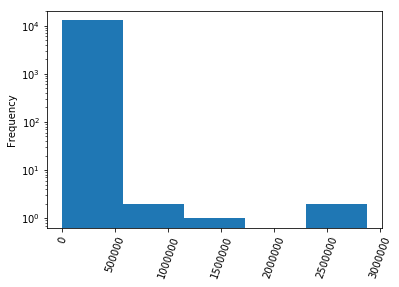

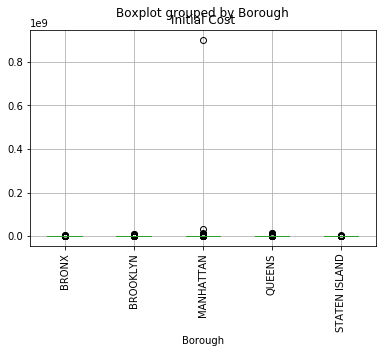

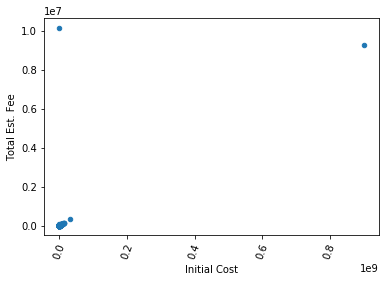

In [3]:
#Cria um Histograma pra ler melhor as infos (formato logaritmico porque os dados são gigantes)
df_subset['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=False, logy=True, bins=5)
plt.show()
plt.clf()

# Cria um BoxPlot para identificar estatisticas basicas de uma variável. Pode ser dividido por outra variável
df_subset.boxplot(column='Initial Cost', by='Borough', rot=90)
plt.show()
plt.clf()

# Cria um ScatterPlot relacionando 
df_subset.plot(kind='scatter', x='Initial Cost', y='Total Est. Fee', rot=70)
plt.show()
plt.clf()

       id                    name  rating position  height   foot  rare  pace  \
0    1001            Gábor Király      69       GK     191  Right     0   NaN   
1  100143            Frederik Boi      65        M     184  Right     0  61.0   
2  100264         Tomasz Szewczuk      57        A     185  Right     0  65.0   
3  100325  Steeve Joseph-Reinette      63        D     180   Left     0  68.0   
4  100326            Kamel Chafni      72        M     181  Right     0  75.0   

   shooting  passing  dribbling  defending  heading  diving  handling  \
0       NaN      NaN        NaN        NaN      NaN    70.0      66.0   
1      65.0     63.0       59.0       62.0     62.0     NaN       NaN   
2      54.0     43.0       53.0       55.0     74.0     NaN       NaN   
3      38.0     51.0       46.0       64.0     71.0     NaN       NaN   
4      64.0     67.0       72.0       57.0     66.0     NaN       NaN   

   kicking  reflexes  speed  positioning  
0     63.0      74.0   35.0    

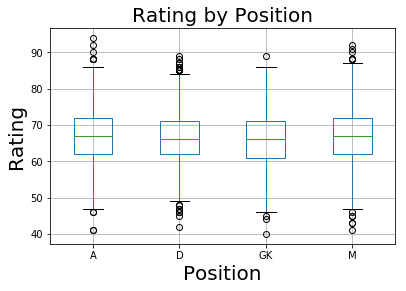

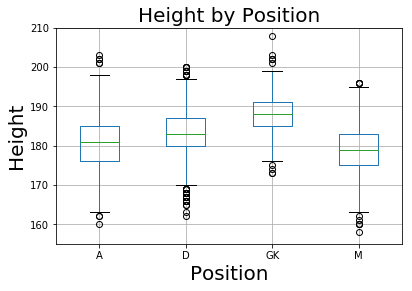

In [40]:
fifa = pd.read_csv('data/fifa.csv')
print(fifa.head())

fifa.boxplot(column='rating', by='position')
plt.xlabel("Position", fontsize=20)
plt.ylabel("Rating", fontsize=20)
plt.title("Rating by Position", fontsize=20)
plt.suptitle('')
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.show()
plt.clf()

fifa.boxplot(column='height', by='position')
plt.xlabel("Position", fontsize=20)
plt.ylabel("Height", fontsize=20)
plt.title("Height by Position", fontsize=20)
plt.suptitle('')
plt.ylim(155,210)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.show()
plt.clf()

In [4]:
#JUNTANDO DADOS

airquality = pd.read_csv('data/airquality.csv')
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)
print(airquality_pivot.head())

# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the new index of airquality_pivot
print(airquality_pivot.index)

# Print the head of airquality_pivot
print(airquality_pivot.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN
measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3
MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [5]:
# DIVIDINDO COLUNAS

tb = pd.read_csv('data/tb.csv')

# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())

  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


In [6]:
#Dividindo Colunas 2

ebola = pd.read_csv('data/ebola.csv')

# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt['type_country'].str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt['str_split'].str.get(1)

# Print the head of ebola_melt
print(ebola.head())
print(ebola_melt.head())
print(ebola_melt.tail())

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0          

In [17]:
#Encontrando arquivos e Dividindo Colunas 3

pattern = 'data/*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

i=0
for csv in csv_files:
    print(str(i) + ": "+csv)
    i+=1

# Load the correct file into a DataFrame
ebola = pd.read_csv(csv_files[5])

# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create Empty Dataframe
status_country = pd.DataFrame()

# Create the 'type' with the STR before the '_'
status_country['type'] = ebola_melt['type_country'].str.split('_').str.get(0)

# Create the 'country' with the STR after the '_'
status_country['country'] = ebola_melt['type_country'].str.split('_').str.get(1)

#axis = 1 significa concatenar as colunas
ebola_tidy = pd.concat([ebola_melt,status_country], axis=1)

print(ebola_tidy.shape)
print(ebola_tidy.head())

del ebola_tidy['type_country']

print(ebola_tidy.head())

0: data/airquality.csv
1: data/baseball.csv
2: data/brics.csv
3: data/cars.csv
4: data/dob_job_application_filings_subset.csv
5: data/ebola.csv
6: data/fifa.csv
7: data/gapminder.csv
8: data/gapminder_2.csv
9: data/mnist.csv
10: data/nyc_uber_2014.csv
11: data/tb.csv
12: data/tips.csv
13: data/titanic_sub.csv
14: data/tweets.csv
15: data/winequality-red.csv
16: data/world_dev_ind.csv
(1952, 6)
         Date  Day  type_country  counts   type country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea
         Date  Day  counts   type country
0    1/5/2015  289  2776.0  Cases  Guinea
1    1/4/2015  288  2775.0  Cases  Guinea
2    1/3/2015  287  2769.0  Cases  Guinea
3    1/2/2015  286     NaN  Cases  Guinea
4  12/31/2014  284  2730.0  Cases  Guinea


In [8]:
#APRENDENDO A USAR REGULAR EXPRESSIONS (EXPRESSOES REGULARES)

# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

result = prog.match('1123-456-7890')
print(bool(result))

# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

# A telephone number of the format xxx-xxx-xxxx
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# A string of the format: A dollar sign, an arbitrary number of digits, a decimal point, 2 digits.
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

# A capital letter, followed by an arbitrary number of alphanumeric characters.
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)

True
False
['10', '1']
True
True
True


In [14]:
tips = pd.read_csv('data/tips.csv')

tips.info()

# Convert the sex and smoker column to type 'category'
tips.sex = tips.sex.astype('category')
tips.smoker = tips.smoker.astype('category')

#Ensure Bill and Tip are numeric and remove any non-numeric value
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

# Print the info of tips
print(tips.info())

def recode_sex(sex_value):

    # Return 1 if sex_value is 'Male'
    if sex_value == 'Male':
        return 1
    
    # Return 0 if sex_value is 'Female'    
    elif sex_value == 'Female':
        return 0
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['sex_recode'] = tips['sex'].apply(recode_sex)

# Print the first five rows of tips
print(tips.head())

# Write the lambda function using replace and regular expressions
tips['total_dollar'] = tips['total_bill'].apply(lambda x: '$'+str(x))
tips['total_dollar_replace'] = tips['total_dollar'].apply(lambda x: x.replace('$', ''))
tips['total_dollar_re'] = tips['total_dollar'].apply(lambda x: re.findall('\d+\.\d+', x)[0])

print(tips.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None
   total_bill   tip     sex smoker  day    time  size sex_recode
0       16.99  1.01  Female     No  Sun  Dinner     2          0
1       10.34  1.66    Male     No  

In [19]:
billboard = pd.read_csv('data/billboard.csv')
print(billboard.head())

# Create the new DataFrame: tracks
tracks = billboard[['year','artist','track','time']]

print(tracks.info())

# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

print(tracks_no_duplicates.info())

   year        artist                    track  time date.entered  wk1   wk2  \
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   87  82.0   
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   91  87.0   
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08   81  70.0   
3  2000  3 Doors Down                    Loser  4:24   2000-10-21   76  76.0   
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15   57  34.0   

    wk3   wk4   wk5  ...   wk67  wk68  wk69  wk70  wk71  wk72  wk73  wk74  \
0  72.0  77.0  87.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  92.0   NaN   NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  68.0  67.0  66.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  72.0  69.0  67.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  25.0  17.0  17.0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   wk75  wk76  
0   NaN   NaN  
1   NaN   NaN  
2   NaN 

   Unnamed: 0   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0           0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1           1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13   
2           2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3           3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4           4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

           ...            2008  2009  2010  2011  2012  2013  2014  2015  \
0          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016        Life expectancy  
0   NaN               Abkhazi

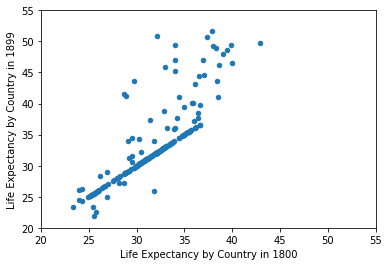

AssertionError: 

In [23]:
g1800s = pd.read_csv('data/gapminder_2.csv')
print(g1800s.head())

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()
plt.clf()
#A linha diagonal significa que muitos paises não possuem informações sobre expectativa de vida em 1800

def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the last column is 'Life expectancy'
assert g1800s.columns[-1] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

In [5]:
gapminder = pd.read_csv('data/gapminder_2.csv')

gapminder_melt = pd.melt(gapminder,id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country','year','life_expectancy']

# Create the series of countries: countries
countries = gapminder_melt.country

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object
